Transformada de Hough
===
------

Transformada de Hough para detecção de linha
===

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

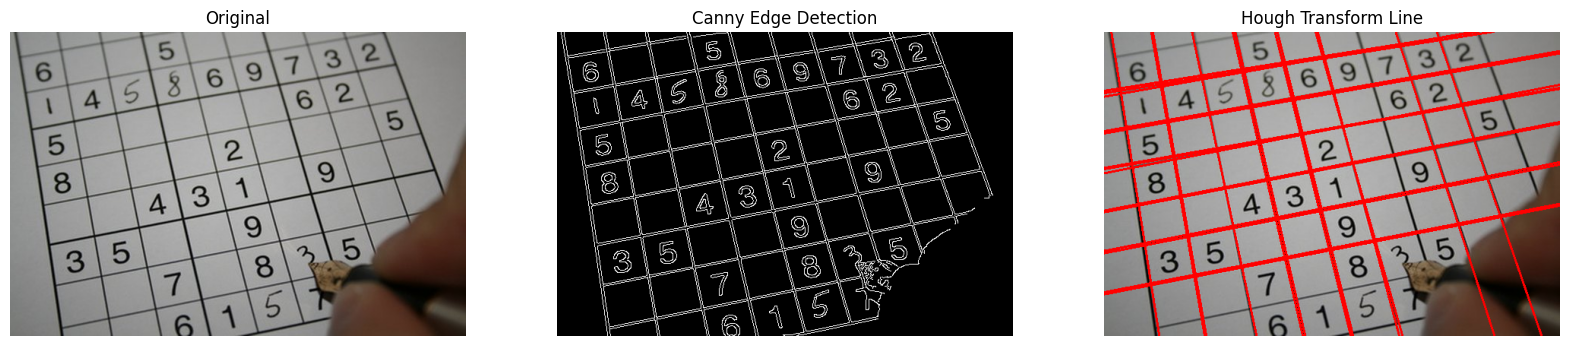

In [2]:
#Carregando a imagem
img = cv.imread('fotolia_4351943_XS.jpg')
img_lines = np.copy(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,200)

#Desenhando as linhas na imagem
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img_lines,(x1,y1),(x2,y2),(0,0,255),2)

#Exibição dos resultados
plt.figure(figsize=(20,7))
plt.subplot(131), plt.title("Original"), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(132), plt.title("Canny Edge Detection"), plt.imshow(edges, 'gray'), plt.axis('off')
plt.subplot(133), plt.title("Hough Transform Line"), plt.imshow(cv.cvtColor(img_lines,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

Transformada de Hough Probabilístico
===

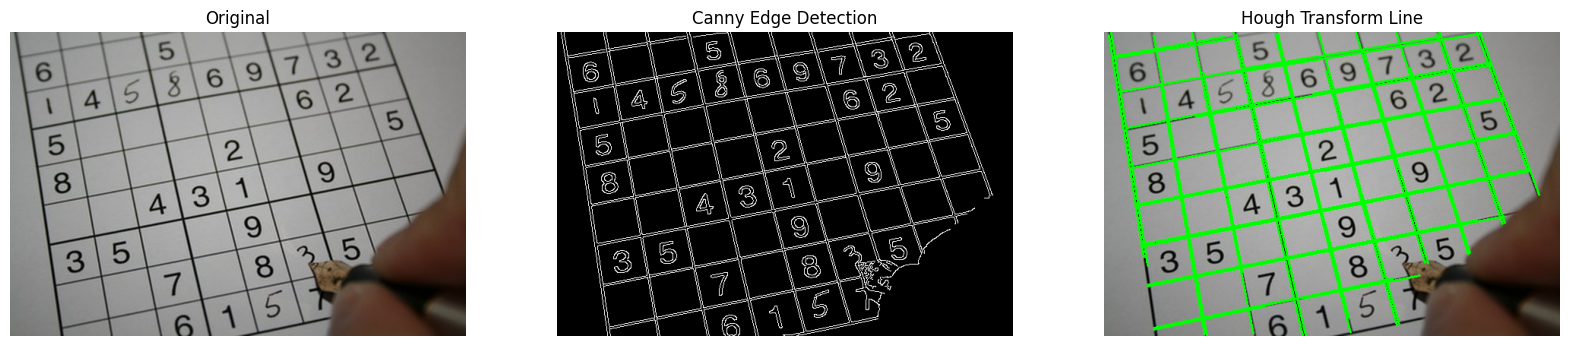

In [3]:
img = cv.imread(cv.samples.findFile('fotolia_4351943_XS.jpg'))
img_lines = np.copy(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLinesP(edges,1,np.pi/180,90,minLineLength=100,maxLineGap=10)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img_lines,(x1,y1),(x2,y2),(0,255,0),2)

#Exibição dos resultados
plt.figure(figsize=(20,7))
plt.subplot(131), plt.title("Original"), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(132), plt.title("Canny Edge Detection"), plt.imshow(edges, 'gray'), plt.axis('off')
plt.subplot(133), plt.title("Hough Transform Line"), plt.imshow(cv.cvtColor(img_lines,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

Transformada de Hough para detecção de círculo
====

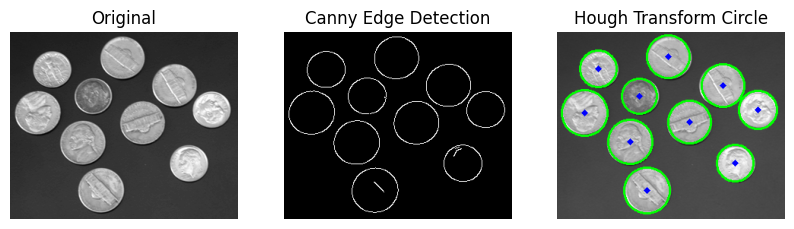

In [4]:
#Carregando a imagem
img = cv.imread('coins.png',0)
blur = cv.medianBlur(img,5)
edges = cv.Canny(blur,150,250,apertureSize = 3)

cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(edges,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

#Exibição dos resultados
plt.figure(figsize=(10,7))
plt.subplot(131), plt.title("Original"), plt.imshow(img,'gray'), plt.axis('off')
plt.subplot(132), plt.title("Canny Edge Detection"), plt.imshow(edges,'gray'), plt.axis('off')
plt.subplot(133), plt.title("Hough Transform Circle"), plt.imshow(cimg, 'gray'), plt.axis('off')
plt.show()

Rotação da imagem
===

[[  0.97437007  -0.22495104  32.75197364]
 [  0.22495104   0.97437007 -17.46040574]]


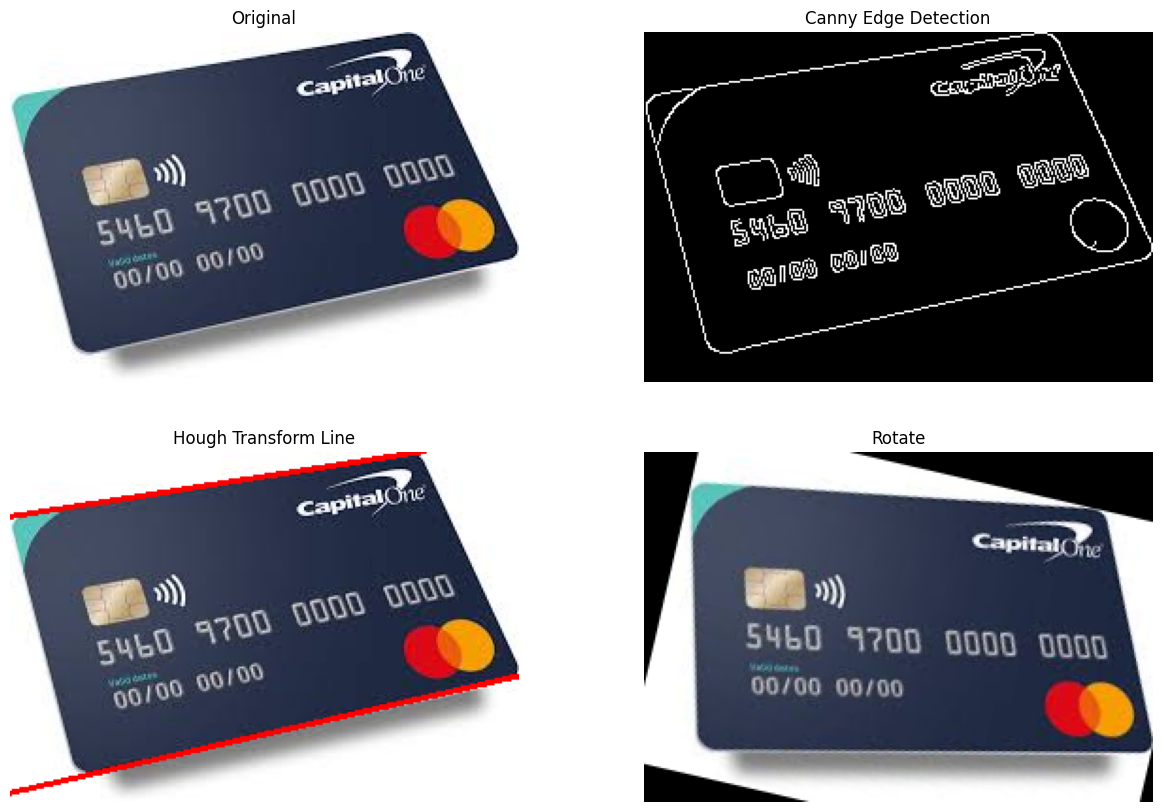

In [5]:
#Carregando a imagem
img = cv.imread('cartao1.jpg')
img_lines = np.copy(img)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,200,500,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,100)

#Desenhando as linhas na imagem
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img_lines,(x1,y1),(x2,y2),(0,0,255),2)

#Obtenção do angulo de rotação
angle = 360 - (90 - theta*(180/np.pi))
#Rotacionando a imagem
rotate = cv.getRotationMatrix2D((img.shape[0]/2,img.shape[1]/2),angle,1)

print(rotate)
rotate_img = cv.warpAffine(img, rotate, dsize=(img.shape[1],img.shape[0]))

#Exibição dos resultados
plt.figure(figsize=(15,10))
plt.subplot(221), plt.title("Original"), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(222), plt.title("Canny Edge Detection"), plt.imshow(edges, 'gray'), plt.axis('off')
plt.subplot(223), plt.title("Hough Transform Line"), plt.imshow(cv.cvtColor(img_lines,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(224), plt.title("Rotate"), plt.imshow(cv.cvtColor(rotate_img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()